In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Prediction Using Decision Tree Algorithm

In [2]:
#read data
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#read data info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#check for null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values or null values

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#different iris species
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

3 different types of species

In [7]:
#one-hot encoding
iris['Label'] = np.where(iris['Species']=='Iris-versicolor',0,np.where(iris['Species']=='Iris-virginica',1,2))
iris['Label'].value_counts()

2    50
1    50
0    50
Name: Label, dtype: int64

### Feature Selection
We apply the Variance Threshold Method to determine which features we need. Features which have low variance has low predictive power.

In [8]:
#we select all features and drop the rest of the columns
iris_features = iris.drop(['Id','Species','Label'],axis=1)
iris_features.shape

(150, 4)

In [9]:
iris_var = VarianceThreshold()
iris_var.fit_transform(iris_features)

#print variance values of each feature
for feature in zip(iris_features.columns, iris_var.variances_):
    print(feature)

('SepalLengthCm', 0.6811222222222223)
('SepalWidthCm', 0.18675066666666668)
('PetalLengthCm', 3.092424888888889)
('PetalWidthCm', 0.5785315555555555)


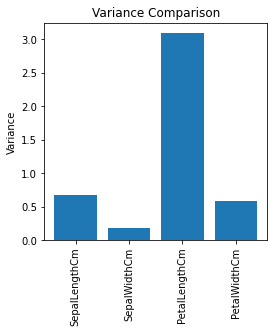

In [10]:
plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_var.variances_)
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

We apply a threshold of 0.2. Since 'SepalWifthCm' has a variance < 0.2, we exclude this feature column in our model.

In [11]:
features = ['SepalLengthCm','PetalLengthCm','PetalWidthCm']

### Split Data into Train and Test Sets

In [12]:
train_X, test_X, train_y, test_y = train_test_split(iris[features],iris['Label'],test_size=0.2,random_state=1)

print('Train dataset shape:',train_X.shape)
print('Test dataset shape:',test_X.shape)

Train dataset shape: (120, 3)
Test dataset shape: (30, 3)


### Determine best parameters for the model

In [13]:
params = {'max_depth': np.arange(2, 8), 'max_features': np.arange(2,5)}

In [14]:
tree = GridSearchCV(DecisionTreeClassifier(),params,cv=10,verbose=1,n_jobs=-1)
tree.fit(train_X,train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.4s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [15]:
tree.best_score_

0.9499999999999998

In [16]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=3)

In [17]:
best_param = tree.best_params_
print(best_param)

vals = list(best_param.values())

{'max_depth': 5, 'max_features': 3}


### Build Decision Tree Model

In [18]:
dt = DecisionTreeClassifier(max_depth=vals[0], max_features=vals[1])
dt.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, max_features=3)

In [19]:
dt_test_predict = dt.predict(test_X)
dt_test_result = pd.DataFrame({'actual':test_y,'predicted':dt_test_predict})
dt_test_result.sample(n=10)

,actual,predicted
29,2,2
66,0,0
146,1,1
98,0,0
120,1,1
44,2,2
131,1,1
51,0,0
16,2,2
99,0,0


In [20]:
#compute for model accuracy
print(accuracy_score(dt_test_result.actual, dt_test_result.predicted) * 100, '%')

96.66666666666667 %


Text(0.5, 15.0, 'Predicted label')

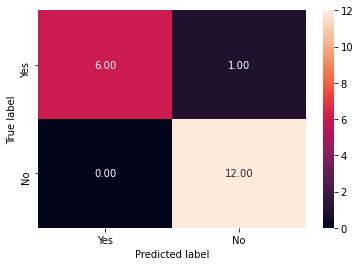

In [21]:
cm = confusion_matrix(dt_test_result.predicted, dt_test_result.actual,labels=[1,0])

sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Yes", "No"], yticklabels=["Yes", "No"])

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Graphical Representation of Decision Tree

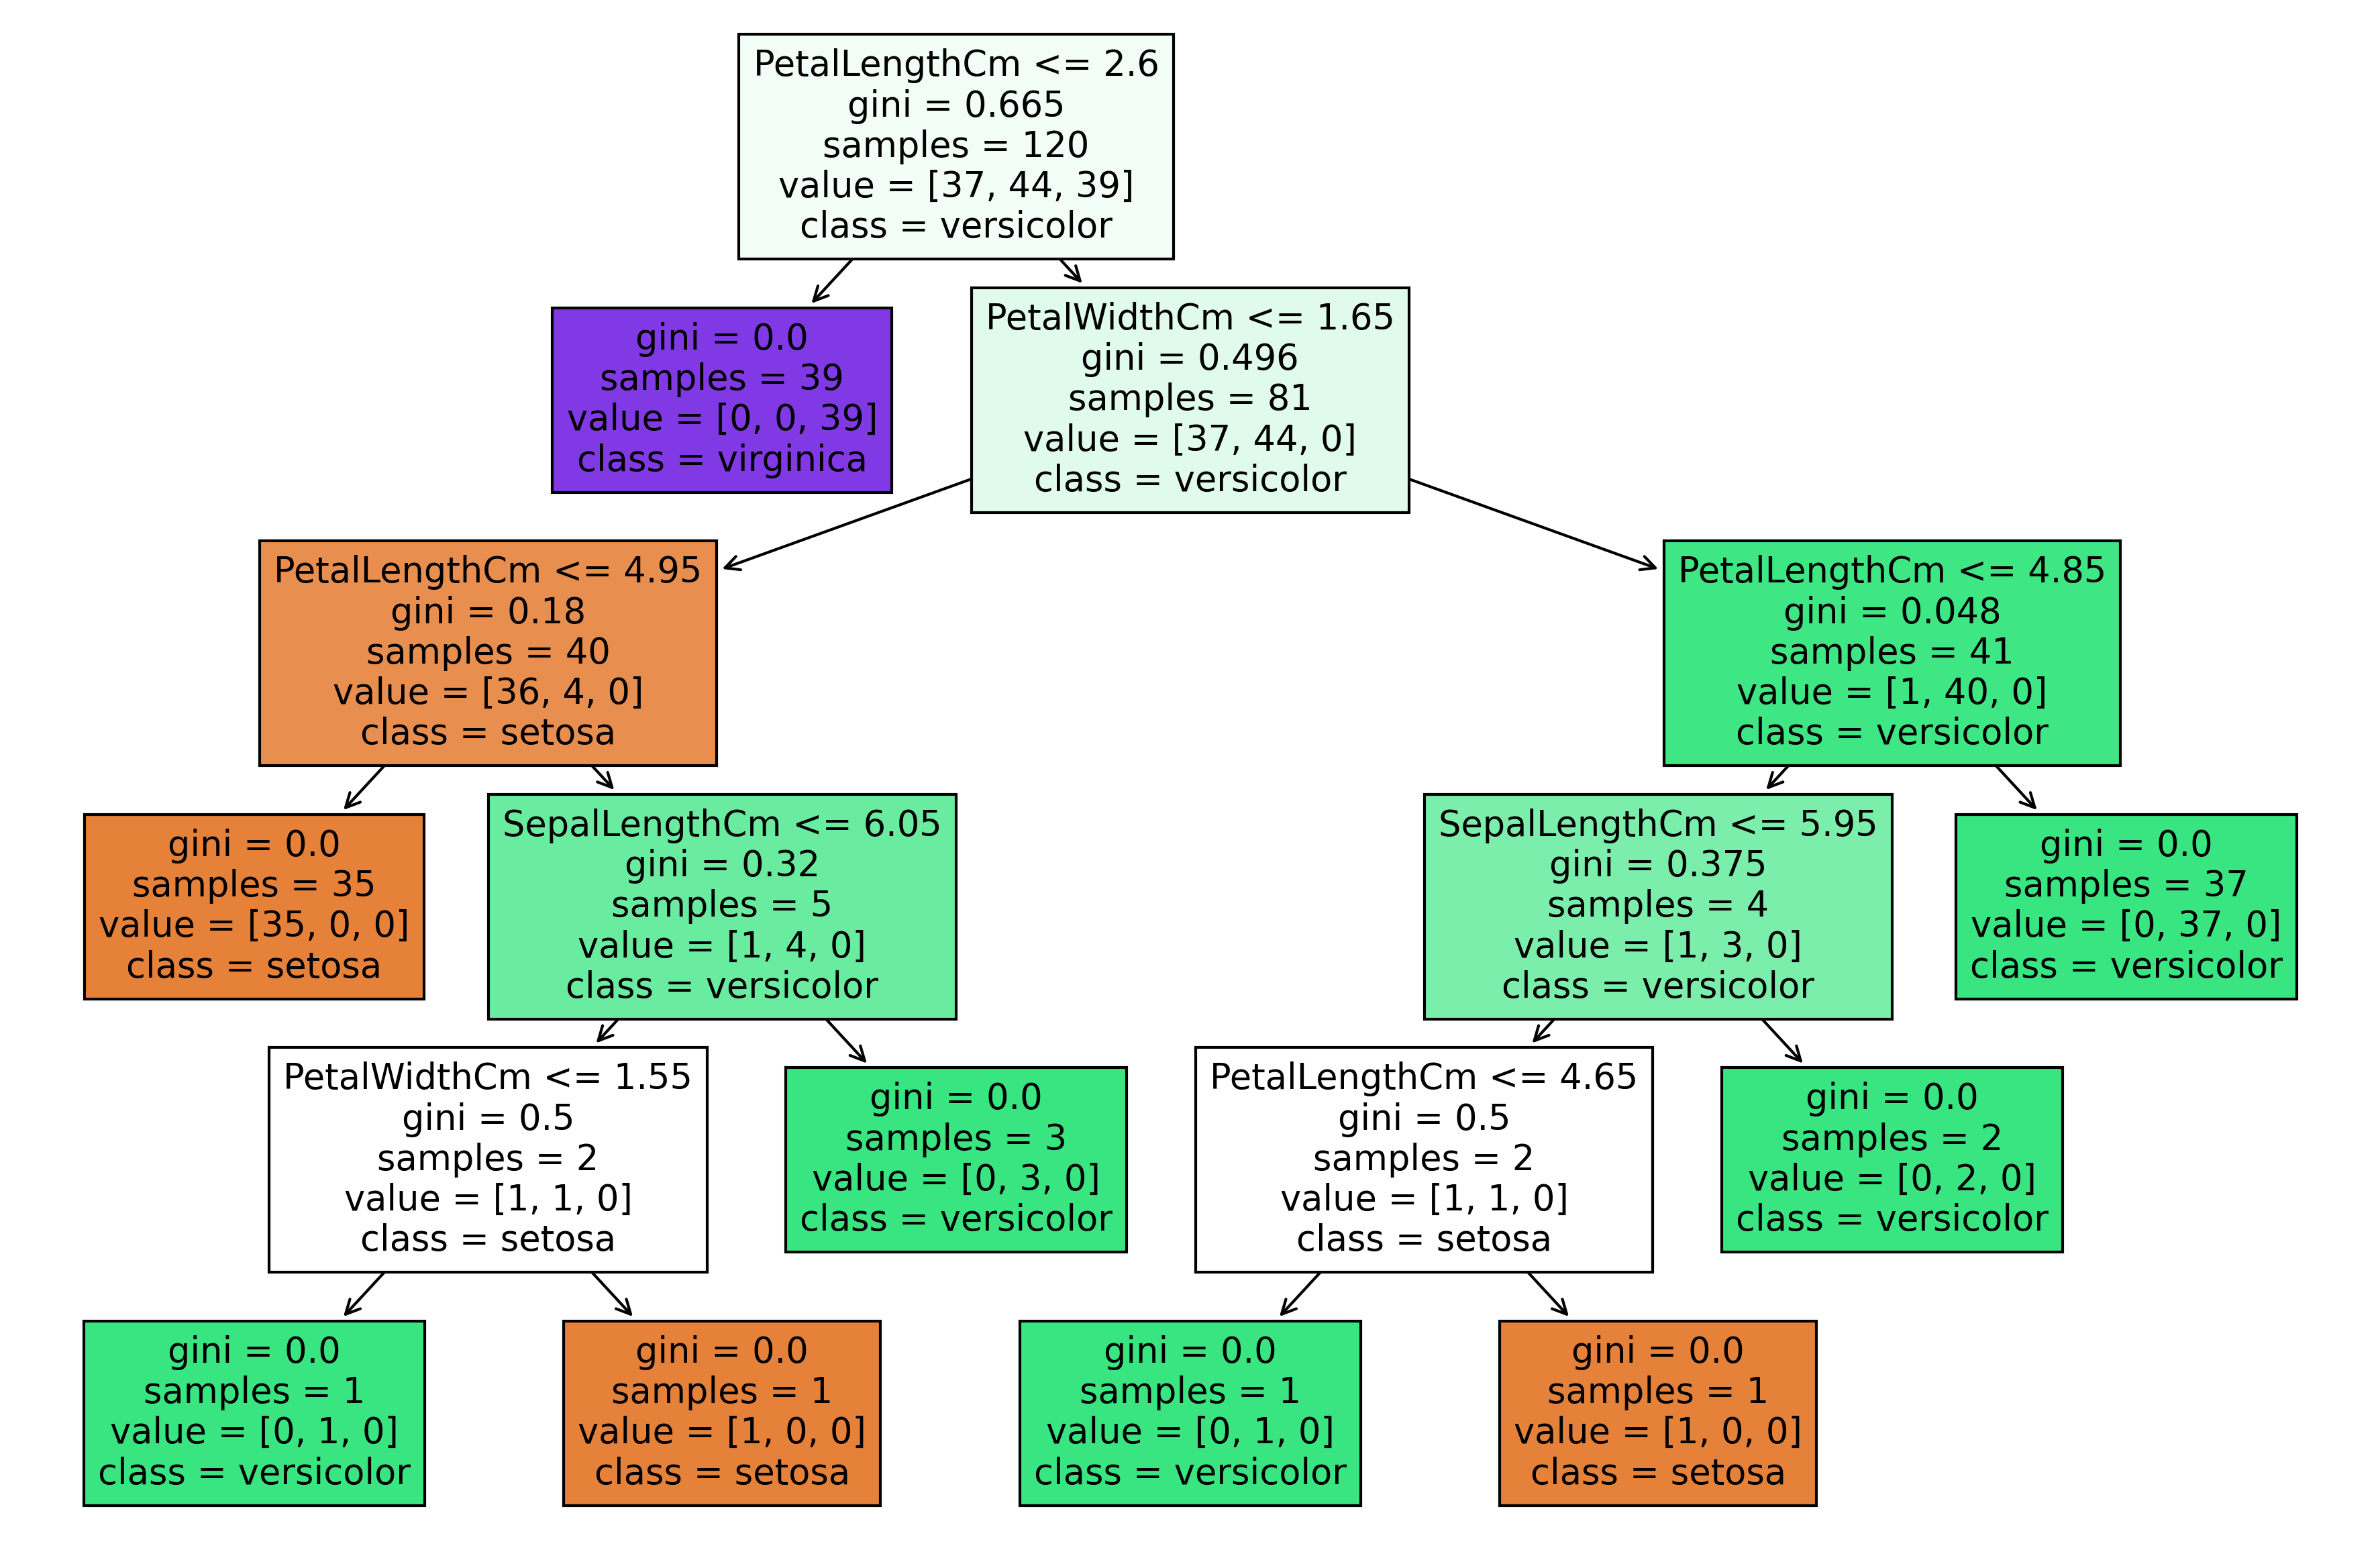

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10),dpi=300)
plot_tree(dt, feature_names=features, class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

### References
[1] https://github.com/dphi-official/Machine_Learning_Bootcamp/blob/master/Supervised_Learning_Walkthrough/Supervised_Machine_Learning_Walkthrough.ipynb

[2] https://github.com/kirtigupta10007/Prediction-using-Decision-Tree-Algorithm/blob/main/Decision%20Tree.ipynb

Code based on [2] but improved upon through feature selection as indicated by [1]